In [3]:
# Import pandas (if no module named pandas -> pip install pandas)
import pandas as pd 

# Read csv file 
sensor_data = pd.read_csv("iwast-the-chamber-of-secrets.csv") 

# Show the first 5 entries
print(sensor_data.head(5))

   Sensor ID  Motherboard ID Motherboard Name          metric  value  \
0         23              11            Harry  Button Pressed    SW3   
1         23              11            Harry  Button Pressed    SW4   
2         23              11            Harry  Button Pressed    SW2   
3         23              11            Harry  Button Pressed    SW1   
4          8              11            Harry     Sound Level  51.97   

                  timestamp unit  
0  2021-04-12T13:11:43.000Z    -  
1  2021-04-12T13:14:25.000Z    -  
2  2021-04-12T13:15:26.000Z    -  
3  2021-04-12T13:15:28.000Z    -  
4  2021-04-12T13:16:35.000Z  dBa  


In [4]:
# replacing blank spaces with '_' because programming language do not like blank spaces!
sensor_data.columns =[column.replace(" ", "_") for column in sensor_data.columns] 

print(sensor_data.head(5))
  
# filter out data so we only keep the sensor dat coming from motherboard voldemort with metric Sound Level
voldemort_data = sensor_data.query('Motherboard_Name == "Voldemort" and metric=="Sound Level"') 

# convert raw timestamps to datetime that pandas can understand
# raw: 2020-01-22T15:34:48.000Z
voldemort_data['timestamp'] =  pd.to_datetime(voldemort_data['timestamp'])

print(voldemort_data.head(5))

   Sensor_ID  Motherboard_ID Motherboard_Name          metric  value  \
0         23              11            Harry  Button Pressed    SW3   
1         23              11            Harry  Button Pressed    SW4   
2         23              11            Harry  Button Pressed    SW2   
3         23              11            Harry  Button Pressed    SW1   
4          8              11            Harry     Sound Level  51.97   

                  timestamp unit  
0  2021-04-12T13:11:43.000Z    -  
1  2021-04-12T13:14:25.000Z    -  
2  2021-04-12T13:15:26.000Z    -  
3  2021-04-12T13:15:28.000Z    -  
4  2021-04-12T13:16:35.000Z  dBa  
    Sensor_ID  Motherboard_ID Motherboard_Name       metric  value  \
20          7              16        Voldemort  Sound Level  90.13   
21          7              16        Voldemort  Sound Level  90.13   
24          7              16        Voldemort  Sound Level  67.17   
26          7              16        Voldemort  Sound Level  98.26   
33     

c:\users\u0092745\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


c:\users\u0092745\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  if sys.path[0] == '':


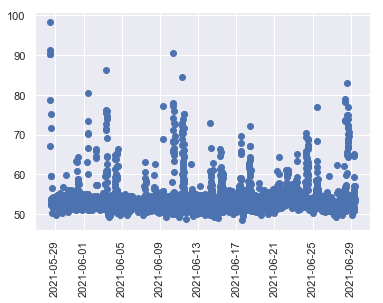

In [29]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as stats

# filter out data so we only keep the sensor data registered after 29/5/2021
voldemort_data = voldemort_data[(voldemort_data['timestamp'] > '2021-05-28 00:00:00')]
# ensure the values are interpreted as floats 
voldemort_data["value"] = voldemort_data["value"].astype(float)

x = np.asarray(voldemort_data.timestamp)
y = np.asarray(voldemort_data.value)
ax = plt.plot_date(x,y)
plt.xticks(rotation=90)
plt.show()

In [23]:
voldemort_data["weekday"] = voldemort_data['timestamp'].dt.weekday
voldemort_data["isweekday"] = (voldemort_data["weekday"] < 5)
print(voldemort_data.head(5))

    Sensor_ID  Motherboard_ID Motherboard_Name       metric  value  \
20          7              16        Voldemort  Sound Level  90.13   
21          7              16        Voldemort  Sound Level  90.13   
24          7              16        Voldemort  Sound Level  67.17   
26          7              16        Voldemort  Sound Level  98.26   
33          7              16        Voldemort  Sound Level  91.34   

                   timestamp unit  weekday  isweekday  
20 2021-05-28 12:23:08+00:00  dBa        4       True  
21 2021-05-28 12:23:15+00:00  dBa        4       True  
24 2021-05-28 12:42:36+00:00  dBa        4       True  
26 2021-05-28 12:43:22+00:00  dBa        4       True  
33 2021-05-28 12:49:42+00:00  dBa        4       True  


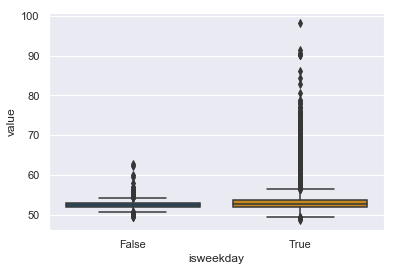

In [24]:
# Make boxplot - grouped for weekend-days vs weekend-days
sns.boxplot(y='value', x='isweekday', 
                 data=voldemort_data, 
                 palette="colorblind")

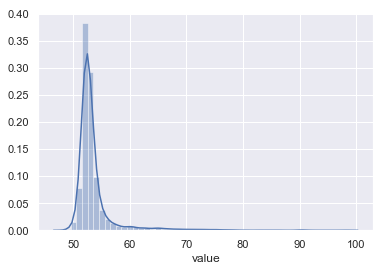

In [34]:
# make histogram to visualize distribution
sns.distplot(voldemort_data["value"])

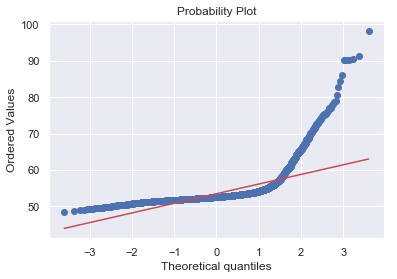

Statistics=0.511, p=0.000


In [35]:
# make qqplot to visualize distribution and check (derivation from) normal distribution
stats.probplot(voldemort_data["value"], dist="norm", plot=plt)
plt.show()
# test for normality
stat, p = stats.shapiro(voldemort_data["value"])
print('Statistics=%.3f, p=%.3f' % (stat, p))

In [42]:
# hypothesis test: non-normal distribution
data_weekdays = voldemort_data[(voldemort_data['isweekday'])]
data_weekend = voldemort_data[~(voldemort_data['isweekday'])]

U1, p = stats.mannwhitneyu(data_weekdays['value'], data_weekend['value'])
print(p)

2.894828681922972e-22


In [47]:
# hypothesis test: normal distribution (NOT APPLICABLE IN THIS CASE, BECAUSE DATA IS NOT NORMALLY DISTRIBUTED!)
stat, p = stats.levene(data_weekdays['value'], data_weekend['value'])
print(p)
stats.ttest_ind(data_weekdays['value'], data_weekend['value'],equal_var=False)

3.533037723377115e-35


Ttest_indResult(statistic=16.96334227824869, pvalue=3.1975610237651493e-62)